## Plot waveforms of Geophone 3 events that likely do not come from the identified boulders

All Geophone 4 events can be classified as either Rock 1 or Rock 2/3

### Import libraries

In [1]:
import pandas as pd
from obspy import read,UTCDateTime
from datetime import datetime, timedelta
import numpy as np
import os
import glob
import sys
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Import functions
fxndir = '../functions/'
sys.path.insert(0,fxndir)
from moon2data import *

### Load catalog of Geophone 3 events

In [2]:
mqdir = '../catalogs/final_catalogs/geo3_geo4_events/'
cat_geo3 = pd.read_csv(mqdir + 'Geophone3_events_catalog_HQ_avg_event_stats.csv')
cat_other3 = cat_geo3.loc[(cat_geo3.possible_source == 'unclear') & (cat_geo3.grade_new == 'AA')]
cat_other3 = cat_other3.reset_index()
evids_other3 = np.unique(cat_other3.evid.tolist())
evid1 = evids_other3[0]
evid2 = evids_other3[1]
evid3 = evids_other3[2]

### Inputs to obtain waveforms

In [3]:
parentdir = '/data/ytamama/Apollo17/LSPE_data/sac_volts_ds/'
minfreq = 3
maxfreq = 35
befwin = 4
aftwin = 25

## Obtain waveforms

### Event 1

In [4]:
row1 = cat_other3.loc[cat_other3.evid == evid1].iloc[0]
arrtime = datetime.strptime(row1.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of reference event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1a = st1.traces[0].times() - befwin
trdata1 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2a = st2.traces[0].times() - befwin
trdata2 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3a = st3.traces[0].times() - befwin
trdata3 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4a = st4.traces[0].times() - befwin
trdata4 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_norma = trdata1 / np.max(np.abs(trdata1))
trdata2_norma = trdata2 / np.max(np.abs(trdata1))
trdata3_norma = trdata3 / np.max(np.abs(trdata1))
trdata4_norma = trdata4 / np.max(np.abs(trdata1))

### Event 2

In [5]:
row2 = cat_other3.loc[cat_other3.evid == evid2].iloc[0]
arrtime = datetime.strptime(row2.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of reference event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1b = st1.traces[0].times() - befwin
trdata1 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2b = st2.traces[0].times() - befwin
trdata2 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3b = st3.traces[0].times() - befwin
trdata3 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4b = st4.traces[0].times() - befwin
trdata4 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_normb = trdata1 / np.max(np.abs(trdata1))
trdata2_normb = trdata2 / np.max(np.abs(trdata1))
trdata3_normb = trdata3 / np.max(np.abs(trdata1))
trdata4_normb = trdata4 / np.max(np.abs(trdata1))

### Event 3

In [6]:
row3 = cat_other3.loc[cat_other3.evid == evid3].iloc[0]
arrtime = datetime.strptime(row3.avg_picktime_SNR, '%Y-%m-%d %H:%M:%S.%f')

# Obtain waveforms of reference event
# Geophone 1
st1 = moon2sac(arrtime,1,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes1c = st1.traces[0].times() - befwin
trdata1 = st1.traces[0].data

# Geophone 2
st2 = moon2sac(arrtime,2,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes2c = st2.traces[0].times() - befwin
trdata2 = st2.traces[0].data

# Geophone 3
st3 = moon2sac(arrtime,3,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes3c = st3.traces[0].times() - befwin
trdata3 = st3.traces[0].data

# Geophone 4
st4 = moon2sac(arrtime,4,befwin,aftwin,minfreq,maxfreq,parentdir)
trtimes4c = st4.traces[0].times() - befwin
trdata4 = st4.traces[0].data

# Normalize relative to Geophone 1
trdata1_normc = trdata1 / np.max(np.abs(trdata1))
trdata2_normc = trdata2 / np.max(np.abs(trdata1))
trdata3_normc = trdata3 / np.max(np.abs(trdata1))
trdata4_normc = trdata4 / np.max(np.abs(trdata1))

### Plot waveforms

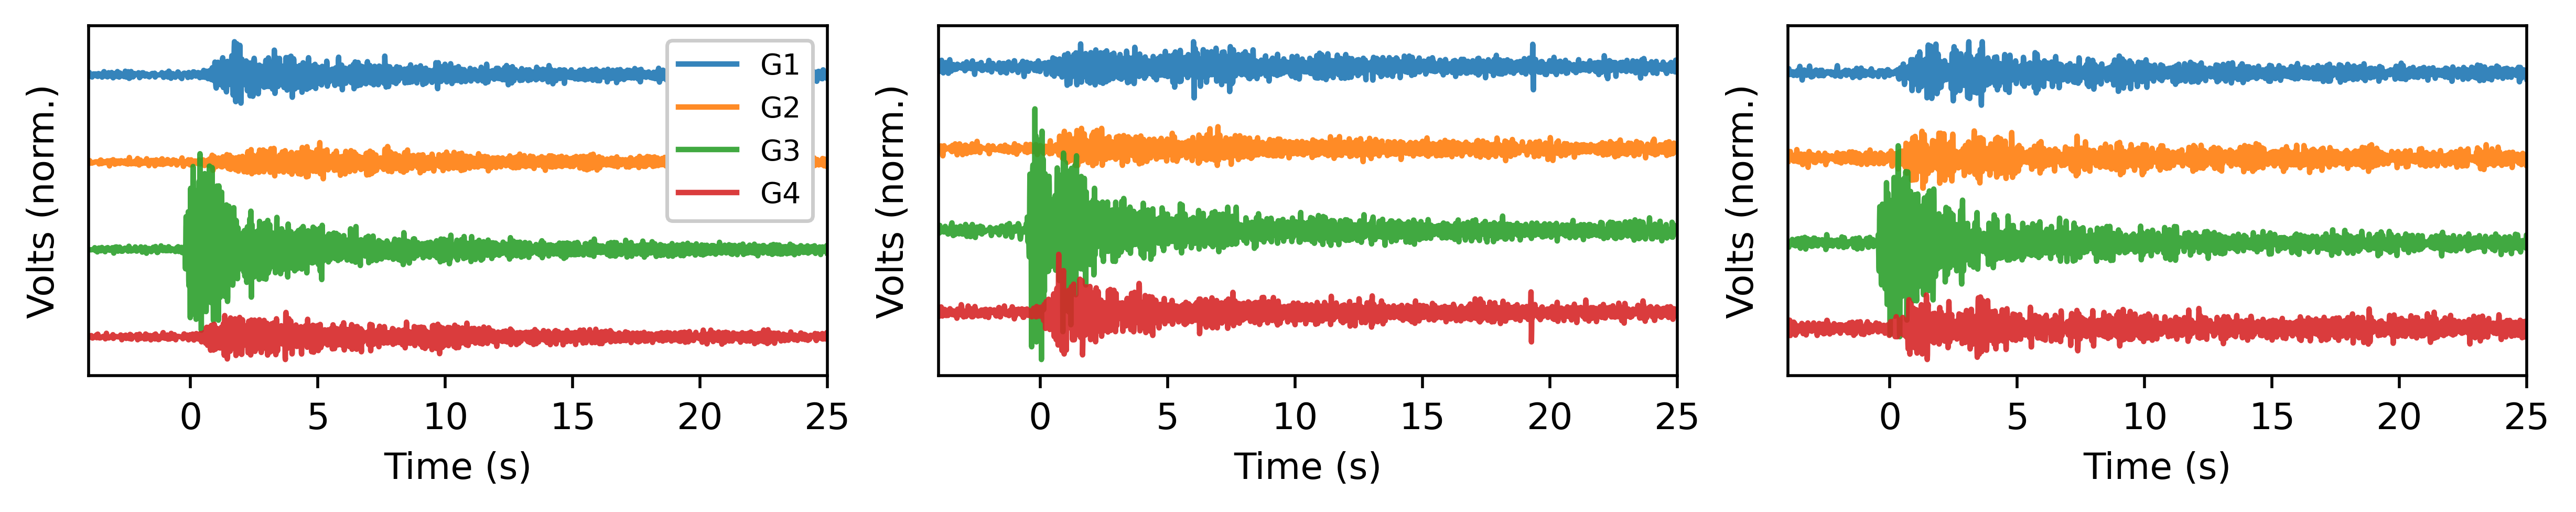

In [7]:
# Initialize figure
fig = plt.figure(figsize=(12., 4.5),dpi=500)
gs = gridspec.GridSpec(2, 3) 

# Event 1
ax1 = fig.add_subplot(gs[0,0])
dist = 2.2
ax1.plot(trtimes1a,trdata1_norma + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax1.set_xlim([-1*befwin,aftwin])
ax1.set_xlabel('Time (s)',fontsize=10)
ax1.set_ylabel('Volts (norm.)',fontsize=10)
ax1.tick_params(axis='both',labelsize=10)
ax1.set_yticklabels([])
ax1.plot(trtimes2a,trdata2_norma + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax1.plot(trtimes3a,trdata3_norma + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax1.plot(trtimes4a,trdata4_norma,color='C3',label=f'G4',alpha=0.9)
ax1.set_yticks([])
ax1.legend(loc='upper right',fontsize=8,framealpha=1)

# Event 2
ax2 = fig.add_subplot(gs[0,1])
ax2.plot(trtimes1b,trdata1_normb + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax2.set_xlim([-1*befwin,aftwin])
ax2.set_xlabel('Time (s)',fontsize=10)
ax2.set_ylabel('Volts (norm.)',fontsize=10)
ax2.tick_params(axis='both',labelsize=10)
ax2.set_yticklabels([])
ax2.plot(trtimes2b,trdata2_normb + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax2.plot(trtimes3b,trdata3_normb + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax2.plot(trtimes4b,trdata4_normb,color='C3',label=f'G4',alpha=0.9)
ax2.set_yticks([])

# Event 3
ax3 = fig.add_subplot(gs[0,2])
ax3.plot(trtimes1c,trdata1_normc + 3.6*dist,color='C0',label=f'G1',alpha=0.9)
ax3.set_xlim([-1*befwin,aftwin])
ax3.set_xlabel('Time (s)',fontsize=10)
ax3.set_ylabel('Volts (norm.)',fontsize=10)
ax3.tick_params(axis='both',labelsize=10)
ax3.set_yticklabels([])
ax3.plot(trtimes2c,trdata2_normc + 2.4*dist,color='C1',label=f'G2',alpha=0.9)
ax3.plot(trtimes3c,trdata3_normc + 1.2*dist,color='C2',label=f'G3',alpha=0.9)
ax3.plot(trtimes4c,trdata4_normc,color='C3',label=f'G4',alpha=0.9)
ax3.set_yticks([])
plt.subplots_adjust(wspace = 0.15, hspace = 0.6)

# Relative amplitudes between geophones is either unclear or inconsistent 
# with the distances between geophones to the 5 boulders identified in this study